In [ ]:
!pip3 install biopython
import Bio
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import patches as mp

In [97]:
def degrees(angle):
    if angle is None:
        return None
    return math.degrees(angle)


In [86]:
def phi_psy(name, location):
    data = pd.DataFrame()
    for model in Bio.PDB.PDBParser().get_structure(name, location):
        for chain in model:
            polypeptides = Bio.PDB.PPBuilder().build_peptides(chain)
            for poly in polypeptides:
                phi_psi_list = poly.get_phi_psi_list()
                for phi, psi in phi_psi_list:
                    data = data.append(pd.DataFrame({'phi' : [degrees(phi)],
                                                     'psi' : [degrees(psi)], 
                                                     'chain_id' : [chain.id]}), ignore_index=True)
    return data

In [91]:
def ramachandran_plot(data):
    colors = ['#F08080', '#C71585','#008B8B', '#FFDAB9']
    patches = []
    plt.clf()
    for color_id, chain_id in enumerate(data.chain_id.unique()):
        plt.scatter(x='phi', y='psi', 
                    data=data.loc[data.chain_id==chain_id], color=colors[color_id])
        patch = mp.Patch(color=colors[color_id], label="chain " + chain_id)
        patches.append(patch)
    plt.xlabel('phi', color='r')
    plt.ylabel('psi', color='r')
    ax = plt.gca()
    ax.set(xlim=(-180, 180), ylim=(-180, 180))
    ax.spines['top'].set_position('center')
    ax.spines['right'].set_position('center')
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.legend(handles=patches)
    plt.show()

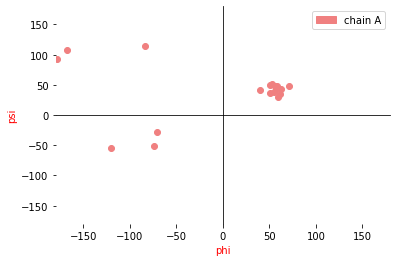

In [98]:
ramachandran_plot(phi_psy("2MTY", "/content/drive/My Drive/Colab Notebooks/determination_of_ peptides/2MTY.pdb"))

/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3056.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3060.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3066.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3091.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 3121.
  PDBConstructionWarning,


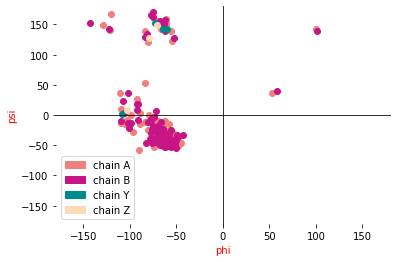

In [99]:
ramachandran_plot(phi_psy("3D9L", "/content/drive/My Drive/Colab Notebooks/determination_of_ peptides/3D9L.pdb"))

/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2621.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2626.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2636.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2642.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2654.
  PDBConstructionWarning,
/usr/local/lib/python3.6/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 2657.
  PDBConstru

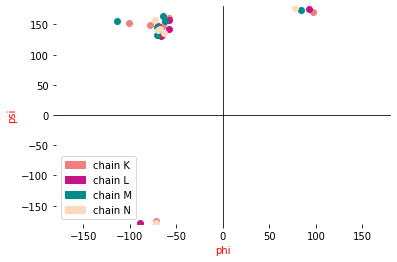

In [100]:
ramachandran_plot(phi_psy("3UXW", "/content/drive/My Drive/Colab Notebooks/determination_of_ peptides/3UXW.pdb"))